<a href="https://colab.research.google.com/github/Tuurash/ALMS/blob/master/EmotionDetectionMerged_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Misc

In [ ]:
a = []
while(1):
    a.append(1)

Dirve mount


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


For Detection From Video

In [25]:
import sys, os
import pandas as pd
import numpy as np
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils
 
import matplotlib.pyplot as plt
%matplotlib inline

For Detection From Audio

In [46]:
pip install SpeechRecognition moviepy

     |████████████████████████████████| 32.8MB 124kB/s 


In [47]:
import speech_recognition as sr 
import moviepy.editor as mp

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1769472/45929032 bytes (3.9%)4857856/45929032 bytes (10.6%)8593408/45929032 bytes (18.7%)12066816/45929032 bytes (26.3%)15990784/45929032 bytes (34.8%)19849216/45929032 bytes (43.2%)23617536/45929032 bytes (51.4%)27344896/45929032 bytes (59.5%)31318016/45929032 bytes (68.2%)35061760/45929032 bytes (76.3%)38641664/45929032 bytes (84.1%)42369024/45929032 bytes (92.2%)

Import Video for Audio Extraction

In [49]:
clip = mp.VideoFileClip(r"/content/drive/MyDrive/EmotionRecognitionDS/Happy.mp4") 
clip.audio.write_audiofile(r"/content/drive/MyDrive/EmotionRecognitionDS/converted.wav")

[MoviePy] Writing audio in /content/drive/MyDrive/EmotionRecognitionDS/converted.wav


100%|██████████| 90/90 [00:00<00:00, 2103.12it/s]

[MoviePy] Done.


Text Extraction

In [51]:
r = sr.Recognizer()
audio = sr.AudioFile("/content/drive/MyDrive/EmotionRecognitionDS/converted.wav")

In [53]:
with audio as source:
  audio_file = r.record(source)
  
result = r.recognize_google(audio_file)

# exporting the result 
with open('recognized.txt',mode ='w') as file: 
    
   file.write(result) 
   print("done!")

done!


**Training Data For Video **

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 3,589 examples.
link: `https://www.kaggle.com/msambare/fer2013`

In [27]:
file = r'/content/drive/MyDrive/EmotionRecognitionDS/fer2013.csv'
df = pd.read_csv(file)
#df=pd.read_csv('gdrive/My Drive/fer2013.csv')
print(df)

       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


In [28]:
X_train,train_y,X_test,test_y=[],[],[],[]
 
for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")
 
 
#print(X_train)

In [29]:
num_features = 64
num_labels = 7
batch_size = 2
epochs = 10
width, height = 48, 48
 
 
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')
 
train_y=np_utils.to_categorical(train_y, num_classes=num_labels)
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)
 
print(X_train)
 
 
#cannot produce
#normalizing data between oand 1
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)
 
X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)
 
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
 
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
 
 
#print(X_test)

[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 74.  81.  87. ... 188. 187. 187.]
 [222. 227. 203. ... 136. 136. 134.]
 [195. 199. 205. ...   6.  15.  38.]]


In [30]:
class_weight = {
    0:1/sum(train_y[:,0]), 
    1:1/sum(train_y[:,1]), 
    2:1/sum(train_y[:,2]), 
    3:1/sum(train_y[:,3]),
    4:1/sum(train_y[:,4]),
    5:1/sum(train_y[:,5]),
    6:1/sum(train_y[:,6])
}

In [31]:
def save_data(X_test, test_y, fname=''):
    """
    The function stores loaded data into numpy form for further processing
    """
    np.save( 'X_test' + fname, test_y)
    np.save( 'y_test' + fname, test_y)
save_data(X_test, test_y,"_privatetest6_100pct")
X_fname = 'X_test_privatetest6_100pct.npy'
y_fname = 'y_test_privatetest6_100pct.npy'
X = np.load(X_fname)
y = np.load(y_fname)

Model Creation

In [32]:
def createModel():
    model = Sequential()
 
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
 
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
 
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
 
    model.add(Dense(7))
    model.add(Activation('softmax'))
 
    return model 
model = createModel()

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_12 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_14 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_13 (Batc (None, 24, 24, 128)      

Plotting accuracy and loss curves for 2nd model

In [34]:
import tensorflow as tf
import keras
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

--2021-02-09 05:46:14--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.003s  

Last-modified header missing -- time-stamps turned off.
2021-02-09 05:46:14 (9.03 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2021-02-09 05:46:14--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubuserconten

Model Initialization

In [43]:
print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model2 = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model2)
print("[INFO] Done")

[INFO] loading model...
[INFO] Done


resize it to have a maximum width of 400 pixels

400 710


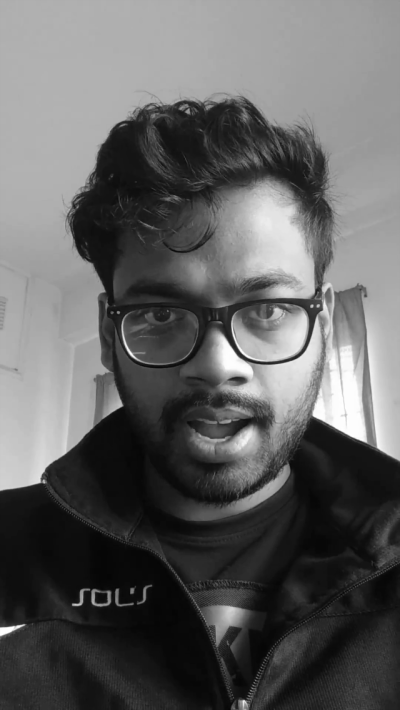

In [44]:
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
path = r'/content/drive/MyDrive/EmotionRecognitionDS/Frames/neutral.png'
test_image = cv2.imread(path)

test_image = imutils.resize(test_image, width=400)
(h, w) = test_image.shape[:2]
print(w,h)
cv2_imshow(test_image)

# resize it to have a maximum width of 400 pixels
test_image = imutils.resize(test_image, width=400)
blob = cv2.dnn.blobFromImage(cv2.resize(test_image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

Prediction Process

In [41]:
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


In [45]:
images = image.load_img("/content/drive/MyDrive/EmotionRecognitionDS/Frames/neutral.png", target_size=(48, 48))    
#images=test_image
x = image.img_to_array(images)
x = tf.image.rgb_to_grayscale(x)
x = np.expand_dims(x, axis=0)
x = x/255.0


predictions=model.predict(x)
#find max indexed array        
max_index = np.argmax(predictions[0])
emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')        
predicted_emotion = emotions[max_index]
print(predicted_emotion)
for i in range(0, detections.shape[2]):

	# extract the confidence (i.e., probability) associated with the prediction
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence threshold
	if confidence > 0.5:
		# compute the (x, y)-coordinates of the bounding box for the object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		# draw the bounding box of the face along with the associated probability
		#text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(test_image, (startX, startY), (endX, endY), (0, 0, 255), 2)
		cv2.putText(test_image, predicted_emotion, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

angry


Installing Text2Emotion

In [56]:
pip install text2emotion

In [57]:
import text2emotion as te

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Recognize Emotion From Text

In [59]:
text=open("/content/recognized.txt","r").read()
te.get_emotion(text)

{'Angry': 0.0, 'Fear': 0.0, 'Happy': 1.0, 'Sad': 0.0, 'Surprise': 0.0}